### **1. Objection: Research and identify the factors that impact CO2 emission the most.** ###


**Sales of passenger vehicles in 2024 were projected to grow by 2.8% year-over-year, according to S&P Global Mobility. This growth, paired with passenger cars contributing approximately 60% of transport sector CO2 emissions, underscores the importance  of a deeper analysis of the key factors driving their environmental impact  as a way to further identify effective mitigative strategies.**

### **2. Data Description:** ###

#### **About the dataset:** ####

This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles.

#### **Collection:** ####

No information about the data collection process is provided by the owner.

#### **Supporting Explanations:** ####

Brand: The brand or manufacturer of the vehicle (e.g., Toyota, Ford, BMW).

Vehicle Type: Classification of vehicles based on size and usage (e.g., SUV, Sedan).

Engine Size (L): Engine displacement volume in liters.

Cylinders: Number of cylinders in the engine.

Transmission: Type of transmission (e.g., Automatic, Manual).

Fuel Type: Type of fuel used by the vehicle (e.g., Z - Gasoline, D - Diesel, X - Hybrid).

Fuel Consumption (City, Hwy, and Combined): Fuel efficiency measured in liters per 100 kilometers (L/100 km).

CO2 Emissions (g/km): Carbon dioxide emissions per kilometer.


#### **Resource:** ####
https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data
#### **Owner: Batuhan Şahan** ####

### **3. Data Processing** ###

#### **a) Importing of the dataset** ####

In [408]:
import pandas as pd
co2 = pd.read_csv("co2.csv")
co2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


#### **b. Data Cleaning and Organizing** ####

 ##### **The data description refers to the first column as 'brand,' while the title is 'Make.' Renaming the column would help avoid any misinterpretation.**  ####

In [411]:
co2.rename(columns = {'Make': 'Brand'}, inplace = True)

 ##### **.sum() used with .isna is used for checking the missing data**  #####

In [413]:
co2.isna().sum()

Brand                               0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**Since I was unable to identify the fuel type marked 'N', I researched randomly selected models with this marking and found that all of them are also gasoline-powered.**


In [415]:
co2 [co2['Fuel Type']== 'N']

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


**Given these findings, I renamed all 'N' to 'Z', which marks the rest of the gasoline-powered cars.**

In [417]:
co2.loc[co2['Fuel Type'] == 'N', 'Fuel Type'] = 'Z'

**For convenience, I renamed the fuel types represented by letters to their actual fuel names.**

In [419]:
co2['Fuel Type'] = co2['Fuel Type'].replace('Z', 'Gasoline')
co2['Fuel Type'] = co2['Fuel Type'].replace('X', 'Hybrid')
co2['Fuel Type'] = co2['Fuel Type'].replace('D', 'Diesel')
co2['Fuel Type'] = co2['Fuel Type'].replace('E', 'Electric')

**To confirm that all the data is in the correct format, I used .dtypes().**

In [421]:
co2.dtypes

Brand                                object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

**To check for multiple recordings of the same data, which could impact the effectiveness of the analysis, I used .duplicated().**

In [423]:
co2[co2.duplicated()]

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Gasoline,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Gasoline,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Gasoline,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Gasoline,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Gasoline,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,Hybrid,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,Hybrid,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,Hybrid,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,Hybrid,7.9,5.9,7.0,40,163


**Since there were duplicate data entries, I had to remove them.**

In [425]:
co2.drop_duplicates(inplace = True)

**To ensure that all duplicates were effectively removed, I rechecked for duplicates using the same function.**

In [427]:
co2[co2.duplicated()]

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


### **4. Exploratory Data Analysis** ###

**Imported libraries**

In [430]:
import seaborn as sns
from scipy.stats import pearsonr

**For the initial check of the relationship between engine size (numerical values) and CO2 emissions, I created scatterplots.**

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

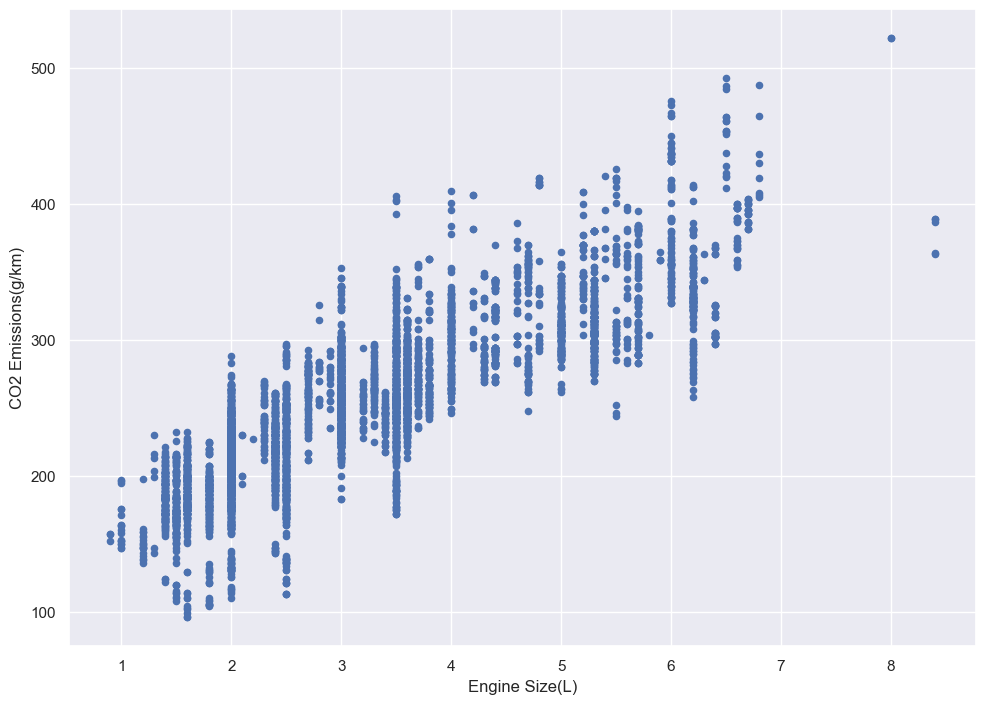

In [432]:
co2.plot.scatter(x='Engine Size(L)', y='CO2 Emissions(g/km)')

**Since there is an obvious relationship, I conducted a deeper numerical analysis by checking the correlation and p-value.**

In [434]:
cor, p_val = pearsonr(co2['Engine Size(L)'], co2 ['CO2 Emissions(g/km)'])
cor, p_val

(0.8548015655053465, 0.0)

**The correlation was found to be strong, and the p-value indicates that the relationship is highly statistically significant.**

<Axes: xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

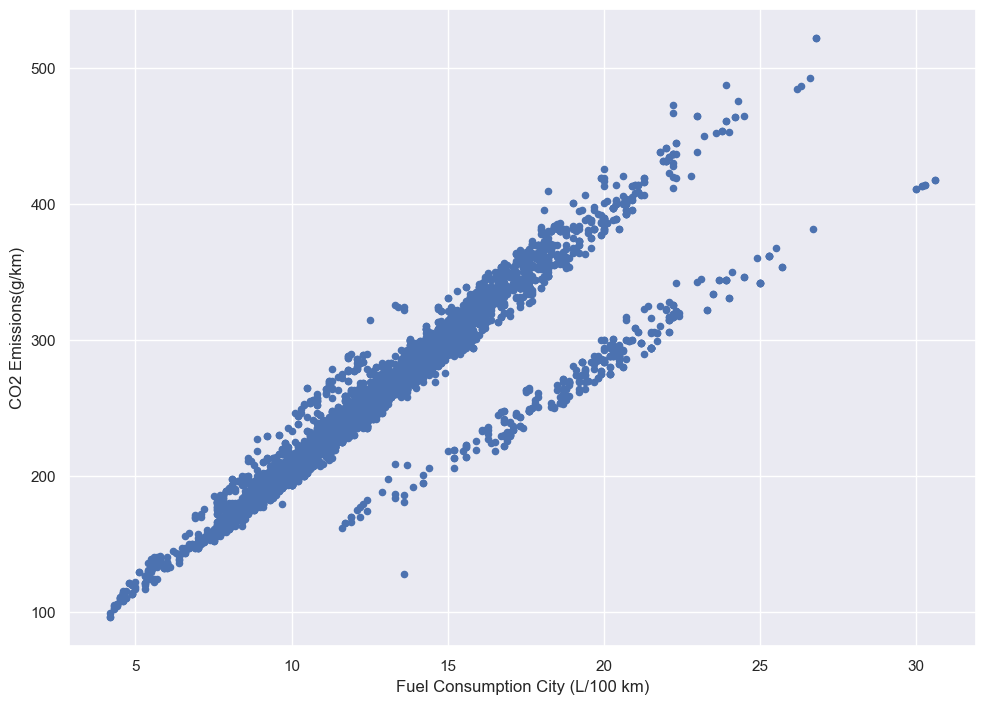

In [436]:
co2.plot.scatter(x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)')

In [437]:
cor, p_val = pearsonr(co2['Fuel Consumption City (L/100 km)'], co2 ['CO2 Emissions(g/km)'])
cor, p_val

(0.9187560004752148, 0.0)

<Axes: xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)'>

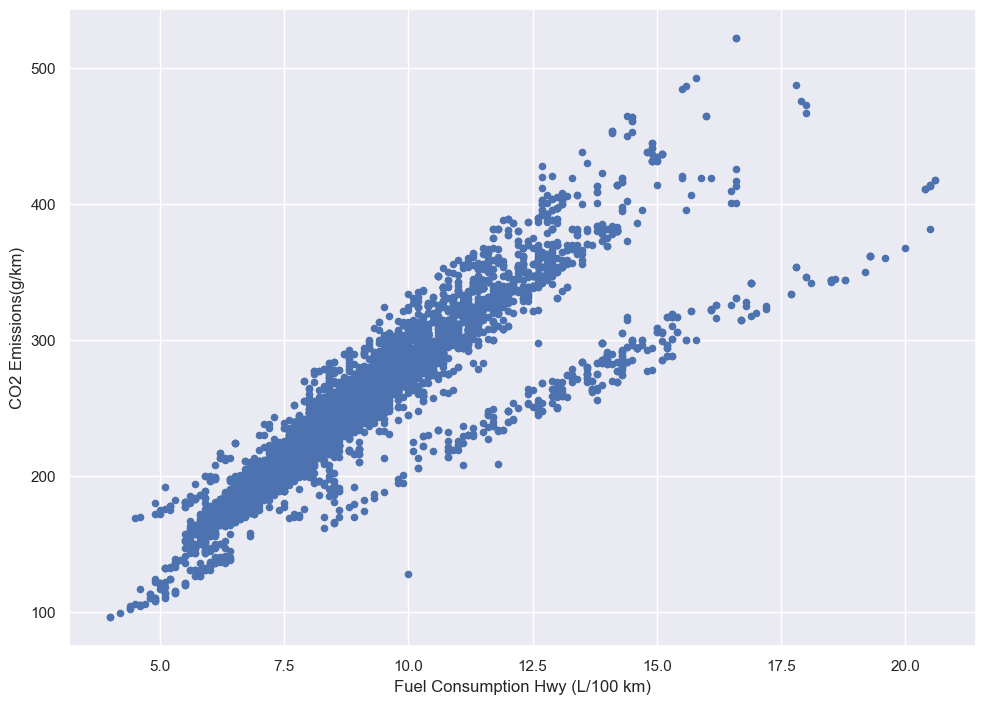

In [438]:
co2.plot.scatter(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)')

In [439]:
cor, p_val = pearsonr(co2['Fuel Consumption Hwy (L/100 km)'], co2 ['CO2 Emissions(g/km)'])
cor, p_val

(0.8834242770119244, 0.0)

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

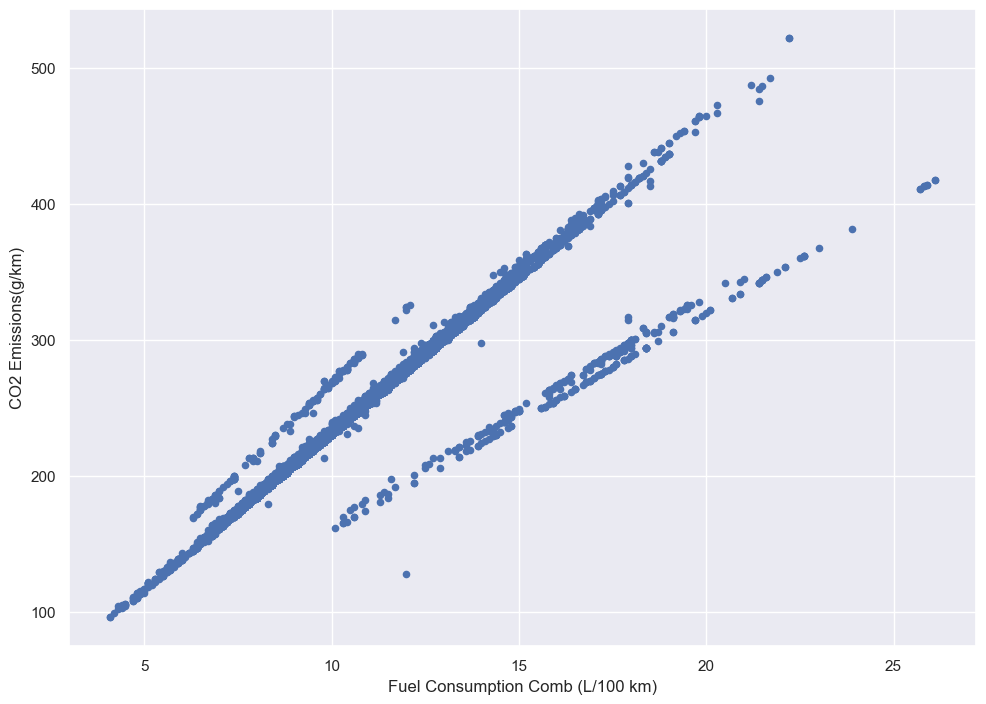

In [440]:
co2.plot.scatter(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')

In [441]:
cor, p_val = pearsonr(co2['Fuel Consumption Comb (L/100 km)'], co2 ['CO2 Emissions(g/km)'])
cor, p_val

(0.9168403485353266, 0.0)

**The same steps were applied to all the factors with numerical values.**

**For better visual representation when constructing boxplots for factors represented by categorical values, I imported the Matplotlib library.**

In [444]:
import matplotlib.pyplot as plt

**The most efficient way to plot the relationship between CO2 emissions and the remaining factors is boxplot visualization.**

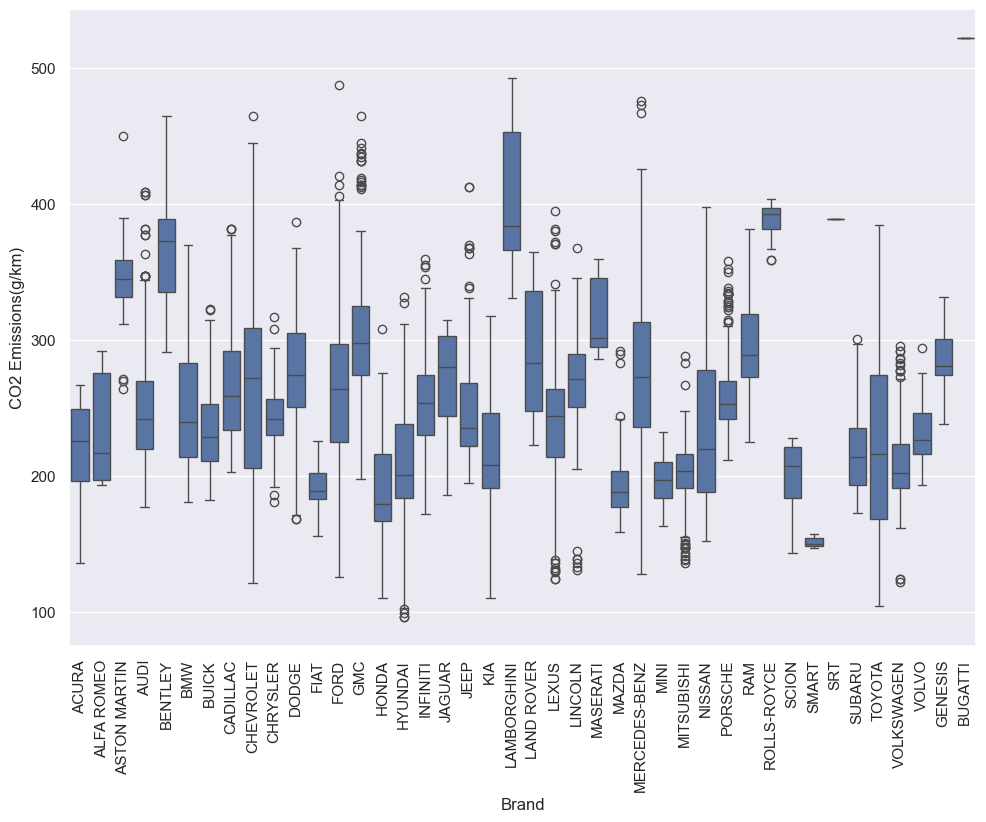

In [446]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Brand', y='CO2 Emissions(g/km)', data = co2)
plt.xticks(rotation=90) 
plt.show()

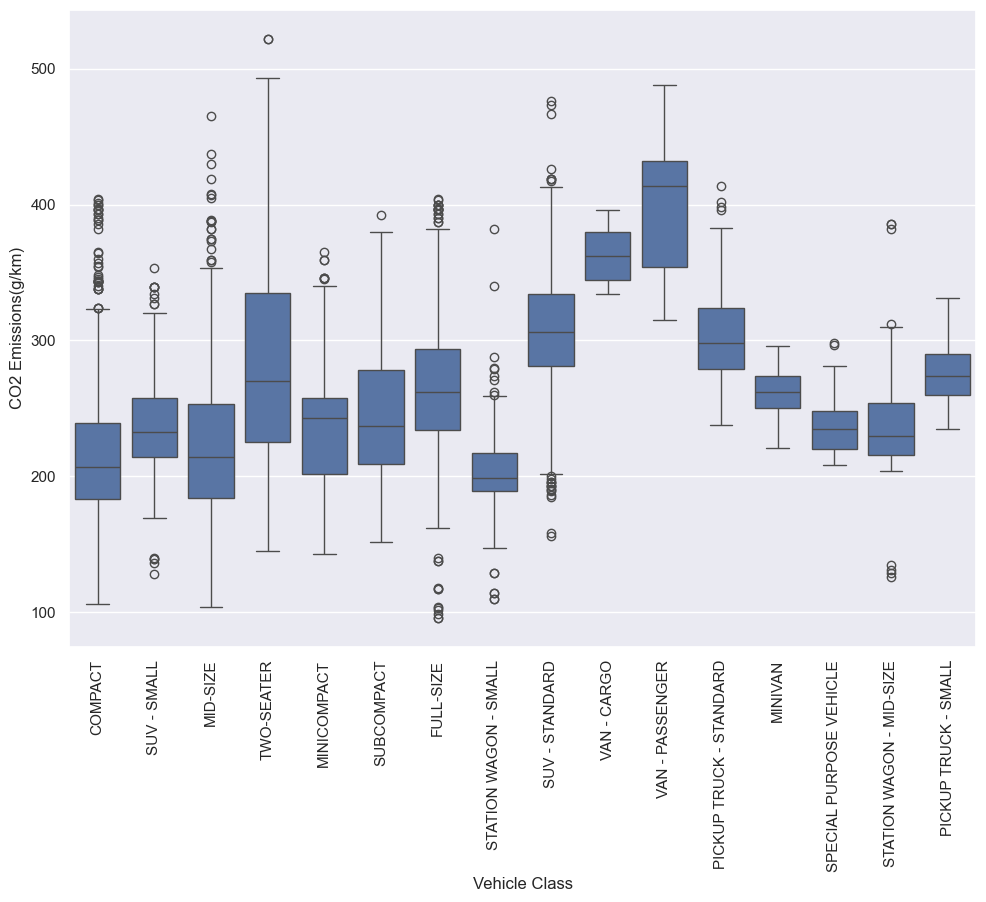

In [447]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data = co2)
plt.xticks(rotation=90) 
plt.show()

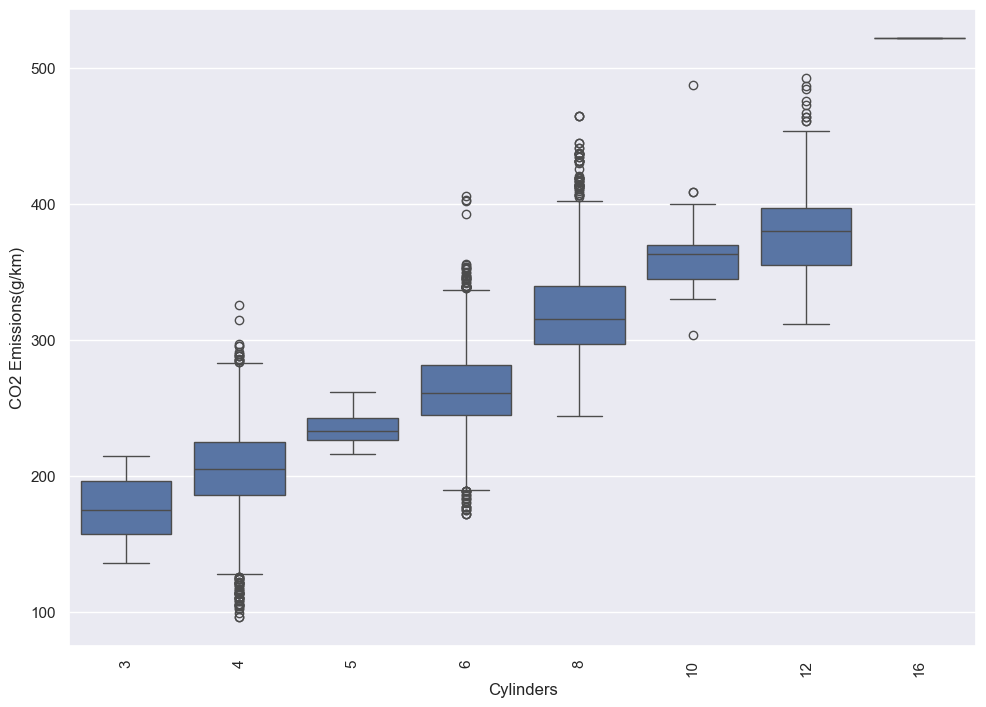

In [448]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data = co2)
plt.xticks(rotation=90) 
plt.show()

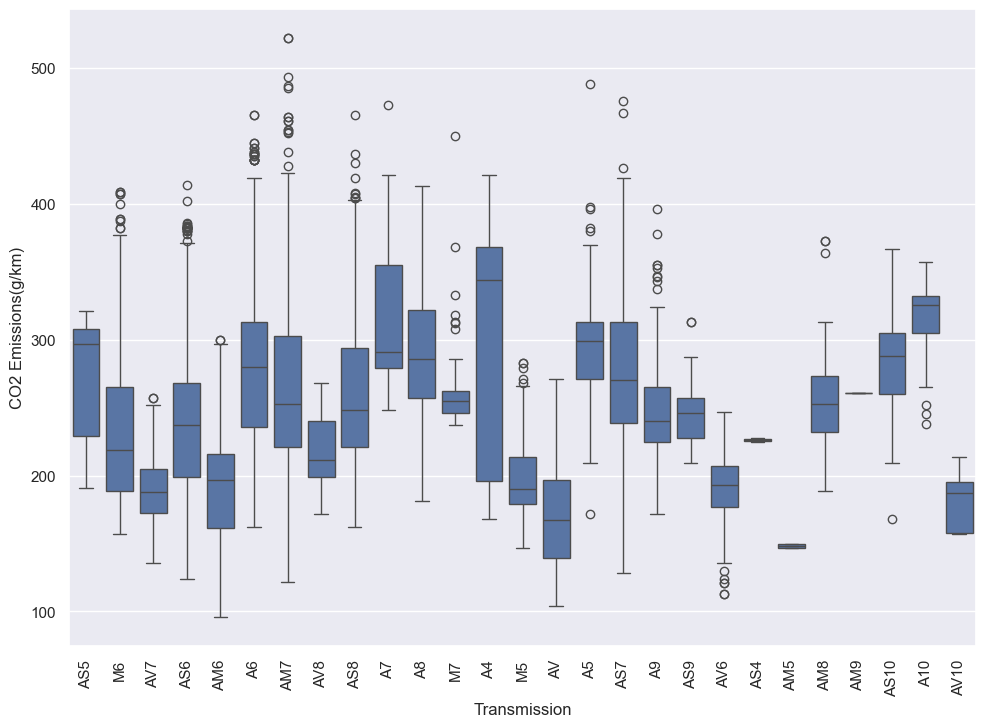

In [449]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data = co2)
plt.xticks(rotation=90) 
plt.show()

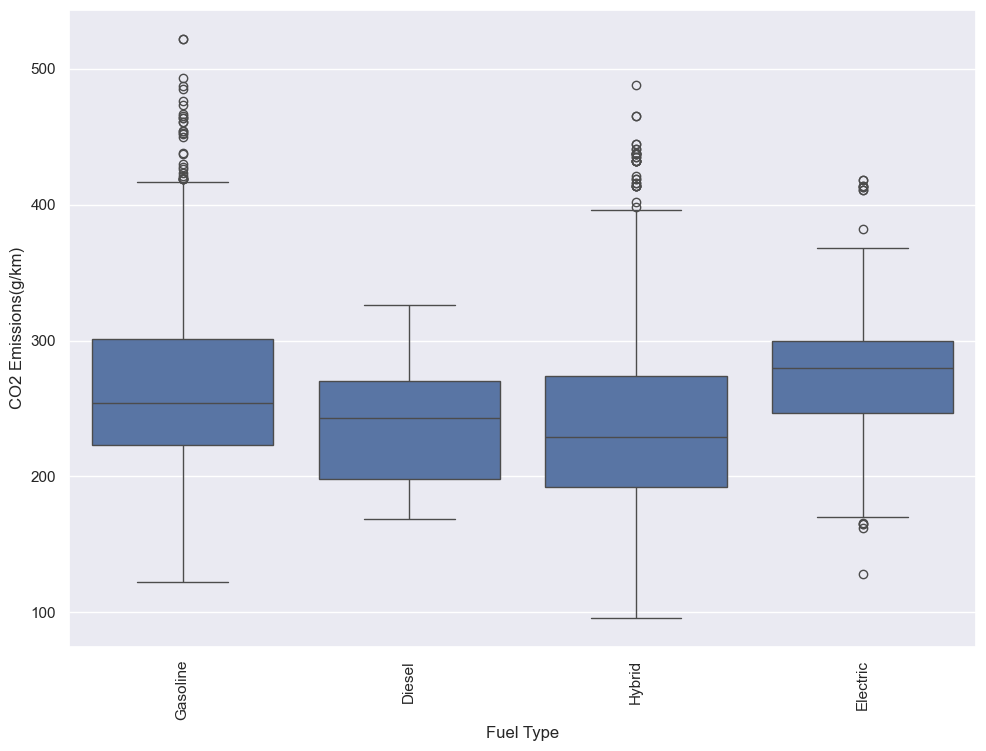

In [450]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data = co2)
plt.xticks(rotation=90) 
plt.show()

**To check the reasonable representation among the brands in the dataset and vehicle class, as the largest and most diverse categories, I created a two-way frequency data table.**

In [452]:
table = pd.crosstab(co2['Brand'], co2['Vehicle Class'], margins=True)
table

Vehicle Class,COMPACT,FULL-SIZE,MID-SIZE,MINICOMPACT,MINIVAN,PICKUP TRUCK - SMALL,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER,All
Brand,,,,,,,,,,,,,,,,,
ACURA,23,0,10,0,0,0,0,0,0,0,0,17,0,1,0,0,51
ALFA ROMEO,0,0,7,0,0,0,0,0,0,0,0,6,0,6,0,0,19
ASTON MARTIN,0,0,0,12,0,0,0,0,0,0,6,0,0,21,0,0,39
AUDI,34,17,63,0,0,0,0,0,0,7,80,23,9,30,0,0,263
BENTLEY,7,0,14,0,0,0,0,0,0,0,10,0,3,1,0,0,35
BMW,171,51,41,0,0,0,0,0,0,11,125,46,41,15,0,0,501
BUGATTI,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2
BUICK,10,3,40,0,0,0,0,0,0,0,0,27,12,0,0,0,92
CADILLAC,38,26,43,0,0,0,0,0,0,6,0,10,18,0,0,0,141


Audi, BMW, Chevrolet, Ford, Mercedes-Benz, Porsche, and Toyota are overrepresented, while SRT, Smart, Alpha Romeo and Bugatti are underrepresented; 
Minivan, special purpose vehicles, station wagon mid-size,  and van-cargo are underrepresented, while compact, midsize, and SUV-small vehicles are overrepresented





In [454]:
table = pd.crosstab(co2['Cylinders'], co2['Transmission'], margins=True)
table

Transmission,A10,A4,A5,A6,A7,A8,A9,AM5,AM6,AM7,...,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7,All
Cylinders,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,2,1,4,3,3,...,0,8,0,0,0,0,10,26,0,88
4,0,27,8,234,6,42,115,0,94,98,...,28,208,4,68,71,27,155,503,0,2749
5,0,0,0,4,0,0,0,0,0,6,...,0,0,0,0,0,0,3,0,0,26
6,5,2,47,182,9,163,104,0,10,171,...,35,25,5,21,21,4,0,157,67,2040
8,23,32,22,259,22,150,40,0,0,58,...,2,0,0,0,0,3,0,77,10,1202
10,0,0,1,1,2,0,0,0,0,26,...,0,0,0,0,0,0,0,10,0,40
12,0,0,0,4,5,21,3,0,0,19,...,0,0,0,0,0,0,0,0,1,135
16,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
All,28,61,78,684,44,378,263,4,107,383,...,65,241,9,89,92,34,168,773,78,6282


The A6 and A8 types of transmission appeared to be overrepresented; 4- and 6-cylinder cars are also overrepresented, particularly when compared to 5- and 16-cylinder vehicles.

In [456]:
table = pd.crosstab(co2['Cylinders'], co2['Fuel Type'], margins=True)
table

Fuel Type,Diesel,Electric,Gasoline,Hybrid,All
Cylinders,,,,,
3,0,0,57,31,88
4,79,51,857,1762,2749
5,0,0,6,20,26
6,68,135,970,867,2040
8,0,144,700,358,1202
10,0,0,39,1,40
12,0,0,135,0,135
16,0,0,2,0,2
All,147,330,2766,3039,6282


Hybrid and Gasoline-powered cars are found to be overrepresented.

### 5. Conclusion ###

**All factors reflected through numerical data (fuel consumption parameters) significantly impact CO2 emissions, as indicated by high correlation rates and p-values of 0 (or close to 0, suggesting high statistical significance). These findings align logically, as higher consumption rates result in more fuel being burned and, consequently, greater post-combustion emissions. Notably, city fuel consumption shows the strongest correlation.**

**Among the categorical factors, premium/luxury segment brands (e.g., Aston Martin, Land Rover, Bugatti) show a more significant impact on the emission rates, given the highest median emission rates and IQRs. However, manufacturers producing vehicles across diverse segments (e.g., Mercedes-Benz, Chevrolet, Toyota) display more variability in their IQR and the difference between minimum and maximum values. Visualization of cylinder count in relation to CO2 emissions reveals that 16-cylinder vehicles have the most dramatic influence, while vehicles with fewer cylinders show a more gradual increase in emission rates (as the number of cylinders increases, consequently, increases the fuel consumption and, therefore, emission). On the other hand, transmission type, vehicle class, and fuel type did not reveal notable trends.**

**It is important to consider that brand/manufacturer representation was not balanced, particularly within the premium/luxury segment, which disproportionately influenced results. Similarly, 16-cylinder vehicles, despite their substantial impact on emissions, were significantly underrepresented. This suggests the need for caution when interpreting findings and highlights the importance of using a more representative dataset.**

**For further analysis, I would consider accesing a more extended dataset, particularly for premium/luxury brands and less common vehicles, such as those with 16-cylinder engines.**
